# **Setup**

In [1]:
import os 
from IPython.display import clear_output
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import bs4 as bs
import requests    
from urllib.request import urlopen

import re
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayyewle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Data Import**

In [2]:
url = 'https://en.wikipedia.org/wiki/Landsat_program'

In [3]:
html_data = urlopen(url).read()

In [4]:
html_data[0:500]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-prefer'

In [5]:
soup = bs.BeautifulSoup(html_data)
# soup

# **Text Data**

## **Extract Text Data**

In [6]:
text = ''

for paragraph in soup.find_all("p"):
    text += paragraph.text

text[0:500]

'\nThe Landsat program is the longest-running enterprise for acquisition of satellite imagery of Earth. It is a joint NASA / USGS program. On 23 July 1972, the Earth Resources Technology Satellite was launched. This was eventually renamed to Landsat 1 in 1975.[1] The most recent, Landsat 9, was launched on 27 September 2021.\nThe instruments on the Landsat satellites have acquired millions of images. The images, archived in the United States and at Landsat receiving stations around the world, are a'

## **Clean Text Data**

In [7]:
# Remove Citation Reference No.
text = re.sub(r'\[[0-9]*\]','',text)
text[0:500]

'\nThe Landsat program is the longest-running enterprise for acquisition of satellite imagery of Earth. It is a joint NASA / USGS program. On 23 July 1972, the Earth Resources Technology Satellite was launched. This was eventually renamed to Landsat 1 in 1975. The most recent, Landsat 9, was launched on 27 September 2021.\nThe instruments on the Landsat satellites have acquired millions of images. The images, archived in the United States and at Landsat receiving stations around the world, are a un'

In [8]:
# Remove New Line
text = re.sub(r'\n','',text)
text[0:500]

'The Landsat program is the longest-running enterprise for acquisition of satellite imagery of Earth. It is a joint NASA / USGS program. On 23 July 1972, the Earth Resources Technology Satellite was launched. This was eventually renamed to Landsat 1 in 1975. The most recent, Landsat 9, was launched on 27 September 2021.The instruments on the Landsat satellites have acquired millions of images. The images, archived in the United States and at Landsat receiving stations around the world, are a uniq'

In [9]:
# Remove Empty Space
text = re.sub(r'\s+',' ',text)
text[0:500]

'The Landsat program is the longest-running enterprise for acquisition of satellite imagery of Earth. It is a joint NASA / USGS program. On 23 July 1972, the Earth Resources Technology Satellite was launched. This was eventually renamed to Landsat 1 in 1975. The most recent, Landsat 9, was launched on 27 September 2021.The instruments on the Landsat satellites have acquired millions of images. The images, archived in the United States and at Landsat receiving stations around the world, are a uniq'

In [10]:
# Convert Text To Lower Case
text = text.lower()
text[0:500]

'the landsat program is the longest-running enterprise for acquisition of satellite imagery of earth. it is a joint nasa / usgs program. on 23 july 1972, the earth resources technology satellite was launched. this was eventually renamed to landsat 1 in 1975. the most recent, landsat 9, was launched on 27 september 2021.the instruments on the landsat satellites have acquired millions of images. the images, archived in the united states and at landsat receiving stations around the world, are a uniq'

## **Sentence Tokenization**

In [11]:
Sentences = nltk.sent_tokenize(text)

print(f'No. Of Sentences: {len(Sentences)}')
print(Sentences[:10])

No. Of Sentences: 77
['the landsat program is the longest-running enterprise for acquisition of satellite imagery of earth.', 'it is a joint nasa / usgs program.', 'on 23 july 1972, the earth resources technology satellite was launched.', 'this was eventually renamed to landsat 1 in 1975. the most recent, landsat 9, was launched on 27 september 2021.the instruments on the landsat satellites have acquired millions of images.', 'the images, archived in the united states and at landsat receiving stations around the world, are a unique resource for global change research and applications in agriculture, cartography, geology, forestry, regional planning, surveillance and education, and can be viewed through the u.s. geological survey (usgs) "earthexplorer" website.', 'landsat 7 data has eight spectral bands with spatial resolutions ranging from 15 to 60 m (49 to 197 ft); the temporal resolution is 16 days.', 'landsat images are usually divided into scenes for easy downloading.', 'each lands

## **Word Tokenization**

In [12]:
Words = nltk.word_tokenize(text)

print(f'No. Of Words: {len(Words)}')
print(Words[:500])

No. Of Words: 2936
['the', 'landsat', 'program', 'is', 'the', 'longest-running', 'enterprise', 'for', 'acquisition', 'of', 'satellite', 'imagery', 'of', 'earth', '.', 'it', 'is', 'a', 'joint', 'nasa', '/', 'usgs', 'program', '.', 'on', '23', 'july', '1972', ',', 'the', 'earth', 'resources', 'technology', 'satellite', 'was', 'launched', '.', 'this', 'was', 'eventually', 'renamed', 'to', 'landsat', '1', 'in', '1975.', 'the', 'most', 'recent', ',', 'landsat', '9', ',', 'was', 'launched', 'on', '27', 'september', '2021.the', 'instruments', 'on', 'the', 'landsat', 'satellites', 'have', 'acquired', 'millions', 'of', 'images', '.', 'the', 'images', ',', 'archived', 'in', 'the', 'united', 'states', 'and', 'at', 'landsat', 'receiving', 'stations', 'around', 'the', 'world', ',', 'are', 'a', 'unique', 'resource', 'for', 'global', 'change', 'research', 'and', 'applications', 'in', 'agriculture', ',', 'cartography', ',', 'geology', ',', 'forestry', ',', 'regional', 'planning', ',', 'surveillance', 

In [13]:
# Split Joint Words
Words_01 = []

for word in Words:
    if '-' not in word:
        Words_01.append(word)
    else:
        Split_Words = word.split('-')
        for split_word in Split_Words:
            Words_01.append(split_word)

print(f'No. Of Words: {len(Words_01)}')
print(Words_01[0:500])  

No. Of Words: 2958
['the', 'landsat', 'program', 'is', 'the', 'longest', 'running', 'enterprise', 'for', 'acquisition', 'of', 'satellite', 'imagery', 'of', 'earth', '.', 'it', 'is', 'a', 'joint', 'nasa', '/', 'usgs', 'program', '.', 'on', '23', 'july', '1972', ',', 'the', 'earth', 'resources', 'technology', 'satellite', 'was', 'launched', '.', 'this', 'was', 'eventually', 'renamed', 'to', 'landsat', '1', 'in', '1975.', 'the', 'most', 'recent', ',', 'landsat', '9', ',', 'was', 'launched', 'on', '27', 'september', '2021.the', 'instruments', 'on', 'the', 'landsat', 'satellites', 'have', 'acquired', 'millions', 'of', 'images', '.', 'the', 'images', ',', 'archived', 'in', 'the', 'united', 'states', 'and', 'at', 'landsat', 'receiving', 'stations', 'around', 'the', 'world', ',', 'are', 'a', 'unique', 'resource', 'for', 'global', 'change', 'research', 'and', 'applications', 'in', 'agriculture', ',', 'cartography', ',', 'geology', ',', 'forestry', ',', 'regional', 'planning', ',', 'surveillance

In [14]:
# Remove Connecting Punctuations
import string
punctuation = [char for char in string.punctuation]

print(len(punctuation),'\n')
print(punctuation)

32 

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [15]:
# Remove Punctuation Marks From Word List
Words_02 = [Word for Word in Words_01 if Word not in punctuation]

print(f'No. Of Words: {len(Words_02)}')
print(Words_02[0:500])

No. Of Words: 2675
['the', 'landsat', 'program', 'is', 'the', 'longest', 'running', 'enterprise', 'for', 'acquisition', 'of', 'satellite', 'imagery', 'of', 'earth', 'it', 'is', 'a', 'joint', 'nasa', 'usgs', 'program', 'on', '23', 'july', '1972', 'the', 'earth', 'resources', 'technology', 'satellite', 'was', 'launched', 'this', 'was', 'eventually', 'renamed', 'to', 'landsat', '1', 'in', '1975.', 'the', 'most', 'recent', 'landsat', '9', 'was', 'launched', 'on', '27', 'september', '2021.the', 'instruments', 'on', 'the', 'landsat', 'satellites', 'have', 'acquired', 'millions', 'of', 'images', 'the', 'images', 'archived', 'in', 'the', 'united', 'states', 'and', 'at', 'landsat', 'receiving', 'stations', 'around', 'the', 'world', 'are', 'a', 'unique', 'resource', 'for', 'global', 'change', 'research', 'and', 'applications', 'in', 'agriculture', 'cartography', 'geology', 'forestry', 'regional', 'planning', 'surveillance', 'and', 'education', 'and', 'can', 'be', 'viewed', 'through', 'the', 'u.s

In [16]:
# Remove Words Shorter Than 4 Characters
Words_03 = [word for word in Words_02 if len(word)>3]

print(f'No. Of Words: {len(Words_03)}')
print(Words_03[0:500])

No. Of Words: 1689
['landsat', 'program', 'longest', 'running', 'enterprise', 'acquisition', 'satellite', 'imagery', 'earth', 'joint', 'nasa', 'usgs', 'program', 'july', '1972', 'earth', 'resources', 'technology', 'satellite', 'launched', 'this', 'eventually', 'renamed', 'landsat', '1975.', 'most', 'recent', 'landsat', 'launched', 'september', '2021.the', 'instruments', 'landsat', 'satellites', 'have', 'acquired', 'millions', 'images', 'images', 'archived', 'united', 'states', 'landsat', 'receiving', 'stations', 'around', 'world', 'unique', 'resource', 'global', 'change', 'research', 'applications', 'agriculture', 'cartography', 'geology', 'forestry', 'regional', 'planning', 'surveillance', 'education', 'viewed', 'through', 'u.s.', 'geological', 'survey', 'usgs', 'earthexplorer', 'website', 'landsat', 'data', 'eight', 'spectral', 'bands', 'with', 'spatial', 'resolutions', 'ranging', 'from', 'temporal', 'resolution', 'days', 'landsat', 'images', 'usually', 'divided', 'into', 'scenes', '

## **Unique Words**

In [17]:
# Unique Words
Unique_Words = set(Words_03)

print(f'No. Of Unique Words: {len(Unique_Words)}')
print(Unique_Words)

No. Of Unique Words: 862
{'surface', 'agencies', 'missions', 'study', 'miles', 'mercury', 'ground', 'fires', '2023.', 'situ', 'where', 'generated', '2029.', 'experiment', '1975', 'states', 'thematic', 'continue', 'virginia', 'strikes', 'later', 'agriculture', 'days', 'ahead', 'mother', 'annual', 'series', 'timelapse', 'resource', '1970.', 'capturing', 'political', 'grows', 'stunt', 'director', 'used', 'countries', 'timing', 'stewart', 'altitude', 'ldcm', 'formation', 'examples', 'civilian', 'called', 'order', 'noted', 'periods.in', 'affect', 'scanners', 'procure', 'program', 'difference', 'passed', 'announced', 'lowest', 'directed', 'procurement', 'idea', 'observing', 'factor', 'barbara', 'population', 'space.the', 'eosat', 'june', 'senate', 'many', 'partnership', 'building', 'estimation', 'satellite', 'fiscally', 'construction', 'geological', 'accessing', 'early', 'detect', 'build', 'company', '1986.landsat', 'local', 'present', 'anthropogenic', 'produced', 'have', 'largely', 'stress'

## **Word Cloud**

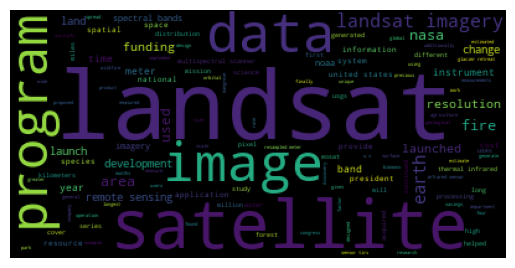

In [18]:
import wordcloud
from wordcloud import WordCloud

Wordcloud_01 = WordCloud().generate(' '.join(Words_03))
plt.imshow(Wordcloud_01)
plt.axis("off")
plt.show()

## **Frequency Distribution**

In [129]:
nltk.FreqDist(Words_03)

FreqDist({'landsat': 75, 'that': 31, 'imagery': 21, 'satellite': 20, 'from': 19, 'data': 17, 'with': 17, 'program': 16, 'earth': 14, 'images': 14, ...})

# **Extract Hyper Links**

In [31]:
for a in soup.find_all('a',href=True):
    if a['href'].startswith('http'):
        print(a['href'],'\n')

https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en 

https://ar.wikipedia.org/wiki/%D9%84%D8%A7%D9%86%D8%AF%D8%B3%D8%A7%D8%AA 

https://ca.wikipedia.org/wiki/Landsat 

https://cs.wikipedia.org/wiki/Landsat 

https://de.wikipedia.org/wiki/Landsat 

https://et.wikipedia.org/wiki/Landsat 

https://es.wikipedia.org/wiki/Landsat 

https://fa.wikipedia.org/wiki/%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87_%D9%84%D9%86%D8%AF%D8%B3%D8%AA 

https://fr.wikipedia.org/wiki/Programme_Landsat 

https://gl.wikipedia.org/wiki/Landsat 

https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%93%9C%EC%83%9B_%EA%B3%84%ED%9A%8D 

https://hy.wikipedia.org/wiki/%D4%BC%D5%A1%D5%B6%D5%A4%D5%BD%D5%A1%D5%BF 

https://hr.wikipedia.org/wiki/Landsat 

https://id.wikipedia.org/wiki/Program_Landsat 

https://it.wikipedia.org/wiki/Landsat 

https://he.wikipedia.org/wiki/%D7%AA%D7%95%D7%9B%D7%A0%D7%99%D7%AA_%D7%9C%D7%90%D7%A0%D7%93%D7%A1%D7%90%D7

In [32]:
Links = [a['href'] for a in soup.find_all('a',href=True) if a['href'].startswith('http')]

print('No. Of Links Found: ', len(Links))
Links[0:10]

No. Of Links Found:  116


['https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 'https://ar.wikipedia.org/wiki/%D9%84%D8%A7%D9%86%D8%AF%D8%B3%D8%A7%D8%AA',
 'https://ca.wikipedia.org/wiki/Landsat',
 'https://cs.wikipedia.org/wiki/Landsat',
 'https://de.wikipedia.org/wiki/Landsat',
 'https://et.wikipedia.org/wiki/Landsat',
 'https://es.wikipedia.org/wiki/Landsat',
 'https://fa.wikipedia.org/wiki/%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87_%D9%84%D9%86%D8%AF%D8%B3%D8%AA',
 'https://fr.wikipedia.org/wiki/Programme_Landsat',
 'https://gl.wikipedia.org/wiki/Landsat']

# **Extract Tables**

In [39]:
Tables = [table for table in soup.find_all('table')]

print('No. Of Tables Found: ', len(Tables))
Tables[0]

No. Of Tables Found:  24


<table class="wikitable sortable" style="width:100%;text-align:center;">
<tbody><tr>
<th>Instrument</th>
<th>Picture</th>
<th>Launched</th>
<th>Terminated</th>
<th>Duration</th>
<th>Notes
</th></tr>
<tr>
<td><a href="/wiki/Landsat_1" title="Landsat 1">Landsat 1</a></td>
<td><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Sketch_of_ERTS-1_renamed_Landsat1.jpg" title="Landsat 1"><img alt="Landsat 1" class="mw-file-element" data-file-height="254" data-file-width="180" decoding="async" height="141" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg/100px-Sketch_of_ERTS-1_renamed_Landsat1.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg/150px-Sketch_of_ERTS-1_renamed_Landsat1.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg 2x" width="100"/></a></span></td>
<td>23 July 1972</td>
<td>6 January 1978</td>
<td>5 years, 6 months and

In [41]:
# Extract Data From A Table

for i,table in enumerate(Tables):
    print(f'Table {i}')
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        # cols = [col.text_strip() for col in cols]
        print(cols)
    print('\n')

Table 0
[]
[<td><a href="/wiki/Landsat_1" title="Landsat 1">Landsat 1</a></td>, <td><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Sketch_of_ERTS-1_renamed_Landsat1.jpg" title="Landsat 1"><img alt="Landsat 1" class="mw-file-element" data-file-height="254" data-file-width="180" decoding="async" height="141" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg/100px-Sketch_of_ERTS-1_renamed_Landsat1.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg/150px-Sketch_of_ERTS-1_renamed_Landsat1.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg 2x" width="100"/></a></span></td>, <td>23 July 1972</td>, <td>6 January 1978</td>, <td>5 years, 6 months and 14 days</td>, <td>Originally named Earth Resources Technology Satellite 1. Landsat 1 carried two vital instruments: a camera built by the <a href="/wiki/RCA" title="RCA">Radio Corporation

In [64]:
# Extract Data From A Single Table

for row in Tables[0].find_all('tr'):
    for col in row.find_all('td'):
        # print(col)
        # print(re.findall(r'\<',col.text()))    

TypeError: 'NoneType' object is not callable

# **Extract Images**

In [65]:
Image_Tags = [image for image in soup.find_all('img')]

print('No. Of Image_Tags Found: ', len(Image_Tags))
Image_Tags[0]

No. Of Image_Tags Found:  60


<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>

In [67]:
# Extract Image Source
Image_URL = [img['src'] for img in Image_Tags]

for url in Image_URL:
    print(url)

/static/images/icons/wikipedia.png
/static/images/mobile/copyright/wikipedia-wordmark-en.svg
/static/images/mobile/copyright/wikipedia-tagline-en.svg
//upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Landsat7photo.jpg/170px-Landsat7photo.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Large_Kolkata_Landsat.jpg/200px-Large_Kolkata_Landsat.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Island_of_Hawai%27i_-_Landsat_mosaic.jpg/200px-Island_of_Hawai%27i_-_Landsat_mosaic.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Virginia_Norwood_VT-Storm-Radar-web.png/220px-Virginia_Norwood_VT-Storm-Radar-web.png
//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Sketch_of_ERTS-1_renamed_Landsat1.jpg/100px-Sketch_of_ERTS-1_renamed_Landsat1.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Landsat-1.jpg/100px-Landsat-1.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Landsat3.jpg/100px-Landsat3.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Landsat5.jpg

# **Extract Videos**

In [68]:
Video_Tags = [video for video in soup.find_all('video')]

print('No. Of Video_Tags Found: ', len(Video_Tags))
Video_Tags[0]

No. Of Video_Tags Found:  4


<video class="mw-file-element" controls="" data-durationhint="447" data-mwprovider="wikimediacommons" data-mwtitle="Landsat_40th.ogv" height="124" id="mwe_player_3" poster="//upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Landsat_40th.ogv/220px--Landsat_40th.ogv.jpg" preload="none" resource="/wiki/File:Landsat_40th.ogv" width="220"><source data-height="360" data-transcodekey="360p.vp9.webm" data-width="640" src="//upload.wikimedia.org/wikipedia/commons/transcoded/3/3b/Landsat_40th.ogv/Landsat_40th.ogv.360p.vp9.webm" type='video/webm; codecs="vp9, opus"'/><source data-height="360" data-transcodekey="360p.webm" data-width="640" src="//upload.wikimedia.org/wikipedia/commons/transcoded/3/3b/Landsat_40th.ogv/Landsat_40th.ogv.360p.webm" type='video/webm; codecs="vp8, vorbis"'/><source data-height="360" data-width="640" src="//upload.wikimedia.org/wikipedia/commons/3/3b/Landsat_40th.ogv" type='video/ogg; codecs="theora, vorbis"'/><source data-height="240" data-transcodekey="240p.vp9.webm" 

In [69]:
# Extract Image Source
Video_URL = [video['src'] for video in Video_Tags]

for url in Video_URL:
    print(url)

KeyError: 'src'